# Sets and Maps

Sets and Maps (similar to stacks/queues) can be implemented using trees or arrays.  Implementing them with trees allows for a $O(log n)$ time for insertion, deletion, and search operations.

## Sets

We could store values using dynamic arrays, but a set ensures that we have unique values in our data structure, and implementing it using a tree ensures that our keys are sorted alphabetically. This is known as a **TreeSet**.

## Maps

Maps operate using a key-value pair. When implemented using trees, its known as as **TreeMap**.

## Implementation

Java and C++ has built-in TreeMap data structures, but Python and JavaScript requires an external library to be imported.

```python
from sortedcontainers import SortedDict
treemap = SortedDict({'c': 3, 'a': 1, 'b': 2})
```

## Problem: Design a TreeMap


You will design a Tree Map, which maps an integer `key` to an integer `value`. Your `Tree` class should support the following operations:

- `TreeMap()` will initialize an binary search tree map., where the trees are ordered by keys

- `void insert(int key, int val)` will map the `key` to the `value` and insert it into the tree.

- `int get(int key)` will return the value mapped with the `key`. If the `key` is not present in the tree, return `-1`.

- `int getMin()` will return the value mapped to the smallest key in the tree. If the tree is empty, return `-1`.

- `int getMax()` will return the value mapped to the largest key in the tree. If the tree is empty, return `-1`.

- `void remove(int key)` will remove the key-value pair with the given key from the tree.

- `int[] getInorderKeys()` will return an array of the keys in the tree in ascending order.
- no duplicate keys

In [126]:
from typing import List
#we'll be using some packages to visualize the trees
import os, sys

#add parent directory
sys.path.append(os.path.dirname(os.getcwd()))

from graph import TreeNode, visualize_tree

#My treemap
class TreeMap:
    
    def __init__(self):
        #the only thing a Tree really needs is root node
        self.root=None

    def insert(self, key: int, val: int) -> None:
        #this implementation wants iteration as root isnt in the argument

        #insert first root node
        if self.root==None:
            self.root=TreeNode(key=key,val=val)
            return

        #search for the correct positon to insert
        curr=self.root

        #make loop repeat
        while True:
            #go right
            if key>curr.key:
                #if right stuff empty, can put there
                if curr.right==None:
                    curr.right=TreeNode(key,val)
                    return
                #else, keep traversing
                curr=curr.right
            #go left
            elif key<curr.key:
                #if left is empty, can put there
                if curr.left==None:
                    curr.left=TreeNode(key,val)
                    return
                curr=curr.left

            #equality means key already exists
            else:
                curr.val=val
                return


    def get(self, key: int) -> int:
        if self.root==None:
            return -1
                #search for the correct positon to insert
        curr=self.root

        #make loop repeat
        while True:
            #go right
            if key>curr.key and curr.right!=None:
                curr=curr.right
            #go left
            elif key<curr.key and curr.left!=None:
                curr=curr.left

            #equality means key already exists
            elif key==curr.key:
                return curr.val

            #key doesnt exist
            else:
                return -1

    def minValueNode(self,root):
        '''will get the min key of the subtree'''
        while root.left:
            root=root.left
        return root
    
    def getMin(self) -> int:
        '''will get min of the entire tree'''
        if self.root==None:
            return -1
        return self.minValueNode(self.root).val


    def getMax(self) -> int:
        #cleaner
        current = self.root
        while current and current.right:
            current = current.right
        return current.val if current else -1

    def remove(self, key: int) -> None:
        #if u wanna remove the root node, depending on whether it has 1 or 2 children, behaviour will be different!
        self.root=self.removeHelper(self.root, key=key)

    def removeHelper(self, root, key):
        # base case, hit none and will be assigned to the parent node if the parent is a leaf node
        if not root:
            return None
        
        if key > root.key:
            root.right = self.removeHelper(root.right, key)
        elif key < root.key:
            root.left = self.removeHelper(root.left, key)

        #found the target
        else:
            #this handles the case of 0 children or only right child
            #if zero children, then return None
            if not root.left:
                print('testleft',root.key)
                #this right child node will be returned and assigned to target's parent node
                return root.right
            
            #handles case of only left child
            elif not root.right:
                print('testright',root.key)
                #this left child node will be returned and assigned to target's parent node
                return root.left
            
            #find the in-order successor
            else:
                print('testfind',root.key)
                #find the minimum (left-most) node of the right subtree
                minNode = self.minValueNode(root.right)
                #override targetNode.val with this minNode
                root.key = minNode.key
                root.val = minNode.val
                #find the minValueNode again and remove it
                root.right = self.removeHelper(root.right, minNode.key)

        #regardless of anything, return this current node
        return root

    def getInorderKeys(self) -> List[int]:
        res=[]
        def inorder(root):
            if not root:
                return    
            inorder(root.left)
            res.append(root.key)
            inorder(root.right)
        inorder(self.root)
        return res




In [127]:
def build_TreeMap_tree():
    #return the TreeMap object

    # Create the nodes
    tm=TreeMap()
    tm.insert(key=1,val='2')
    tm.insert(key=4, val='2')
    tm.insert(key=3, val='7')
    tm.insert(key=2,val='1')
    print(tm.getInorderKeys())
    tm.remove(key=1)
    print(tm.getInorderKeys())
    return tm

tm=build_TreeMap_tree()


[1, 2, 3, 4]
testleft 1
[2, 3, 4]


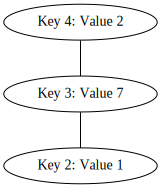

In [128]:
visualize_tree(tm.root,TreeMap=True)